In [1]:
import numpy as np
import matplotlib.pyplot as plt

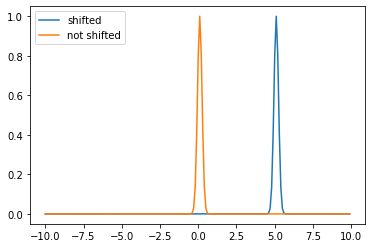

In [50]:
# Question 1: A function that shifts an array by an arbitray amount 
# has to use convolution 

# sort of following the example from class:

def shifter(array,shift):
    N = len(array)
    k = np.arange(N)
    J = np.complex(0,1)
    array_ft = np.fft.fft(array)
    new_array_ft  = array_ft*np.exp(-2*np.pi*J*k*shift/N)
    new_array = np.real(np.fft.ifft(new_array_ft))
    return new_array

# now let's make a Gaussian! 
def gauss(x, mu, sig):
    return np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))

# making some data 
x = np.arange(-10,10,0.1)
y = gauss(x,0.1,0.15)
y_shift = shifter(y,50)

#plotting 
plt.plot(x,y_shift,label='shifted')
plt.plot(x,y,label='not shifted')
plt.legend()

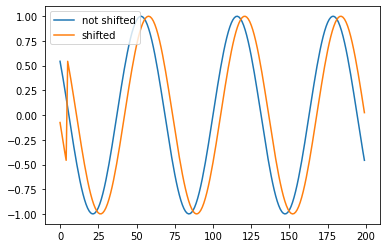

In [52]:
#shifting some other function for fun 
y_sin = np.sin(x)
y_sin_shift = shifter(y_sin,5)
plt.plot(y_sin,label='not shifted')
plt.plot(y_sin_shift,label='shifted')
plt.legend()

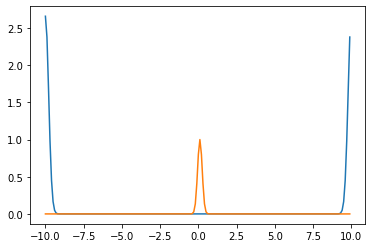

In [53]:
# Question 2 
# Function that takes the correlation function of 2 arrays 

def correlation(f,g):
    f_ft = np.fft.fft(f)
    g_ft = np.conj(np.fft.fft(g))
    f_corr_g = np.fft.ifft(f_ft*g_ft)
    return f_corr_g

# plotting the gaussian from part 1 convoluted with itself 

plt.plot(x,correlation(y,y))
plt.plot(x,y)

In [54]:
# Question 3 

# function that takes the correlation function of 
# a shifted gaussian with itself 
# how does the correlation function depend on the shift? Surprising? 

def shift_correlation(f,shift):
    f_shift = shifter(f,shift)
    f_corr = correlation(f_shift,f_shift)
    return f_corr

In [71]:
# Question 4 - fixing the wrap around nature of convolutions 

# defining a function that convolves!

# according to the internet, wrap around is something you don't want 
# like when you convolve the pixels of a picture they can pop up
# on the other side 
# but apparently, you can add zeros to the shorter array, and that should
# fix the problem 

    
def conv_safe(f1,f2):
    print('initial length of the first array is:',len(f1))
    print('initial length of the second array is:',len(f2))

    if len(f1) < len(f2):
        f1 = np.pad(f1,(1,len(f2)-len(f1)-1),'constant')
        f2 = np.pad(f2,(1,1),'constant')
    if len(f2) < len(f1):
        f1 = np.pad(f1,(1,1),'constant')
        f2 = np.pad(f2,(1,len(f1)-len(f2)-1),'constant') 
    if len(f1) == len(f2):
        f1 = np.pad(f1,(1,1),'constant')
        f2 = np.pad(f2,(1,1),'constant')
    print('the length of the first array is now:',len(f1))
    print('the length of the second array is now:',len(f2))

    return np.fft.ifft(np.fft.fft(f1)*np.fft.fft(f2))



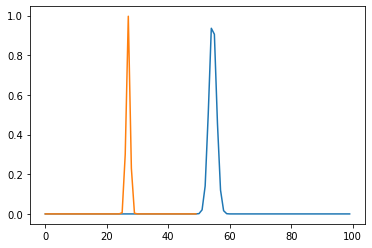

In [72]:
#making some gaussians 
x1 = np.linspace(-10,10,100)
gauss1 = gauss(x1,1,0.25)
x2 = np.linspace(-10,10,50)
gauss2 = gauss(x2,1,0.25)

plt.plot(gauss1)
plt.plot(gauss2)

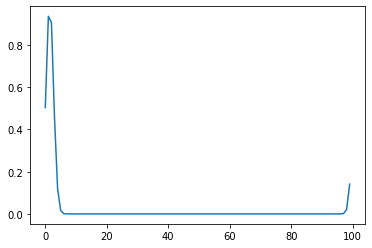

In [81]:
#I can shift one of them 
gauss1_shift = shifter(gauss1,47)
plt.plot(gauss1_shift)

initial length of the first array is: 100
initial length of the second array is: 50
the length of the first array is now: 104
the length of the second array is now: 104
it didnt break!


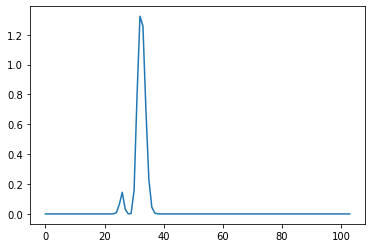

In [82]:
#plotting the safe convolution of these
plt.plot(conv_safe(gauss1_shift,gauss2))
print('it didnt break!')

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in true_divide
  
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':


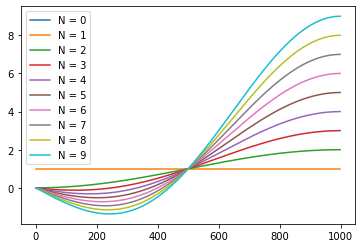

In [27]:
# Question 5, the part a) proof of the following expression can be found in the attached pdf 

# for part b) I'd like to demonstrate that the expression approaches N as k approaches 0

def funky(k,N):
    J = np.complex(0,1)
    numerator = 1 - np.exp(-2*np.pi*J*k)
    denominator = 1 - np.exp(-2*np.pi*J*k/N)
    return numerator/denominator
    

N = np.arange(10)
k = np.linspace(1,0,1000)

for i in N:
    plt.plot(funky(k,N[i]),label=(f'N = {i}'))
    plt.legend()

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':


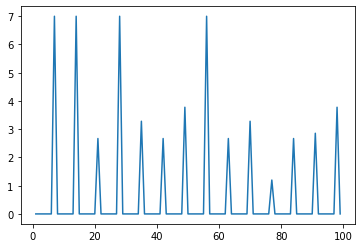

In [28]:
#Let's try an N value of 7, 

k2 = np.arange(100)
N2 = 7
plt.plot(np.abs(funky(k2,N2)))

#looks like the function drops to 0 for all non-integer k values! 

In [35]:
# Let's plot the analytic solution of a dft of a non-integer sine wave 


k = 5.1
N_test = 100
x_sin = np.linspace(-50,50,100)
kp = np.fft.fftfreq(x_sin.size,1/len(x_sin))

def funky_sin(k,kp,N):
    J = np.complex(0,1)
    num1 = 1 - np.exp(2*np.pi*J*(k-kp))
    denom1 = 1 - np.exp(2*np.pi*J*(k-kp)/N)
    num2 = 1 - np.exp(-2*np.pi*J*(k+kp))
    denom2 = 1 - np.exp(-2*np.pi*J*(k+kp)/N)
    
    return ((num1/denom1) - (num2/denom2))*(1/(2*J))


analytic = np.abs(funky_sin(k,kp,N_test))
numeric = np.abs(np.fft.fft(np.sin(2*np.pi*k*x_sin/N_test)))

the precision here is: 0.421234494896921
that isnt very low, Im not sure what I did wrong....


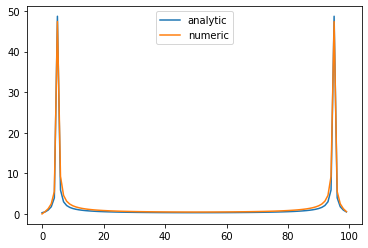

In [36]:
plt.plot(analytic,label='analytic')
plt.plot(numeric,label='numeric')
plt.legend()
print('the precision here is:',np.mean(np.abs(numeric-analytic)))
print('that isnt very low, Im not sure what I did wrong....')

the length of the first array is: 102
the length of the second array is: 102
hmmm makes no sense


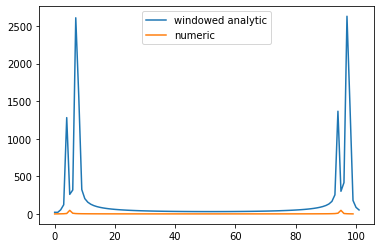

In [40]:
# windowing? 
# it seems like we need to convolve our window function with our analytic function 

# we'll start by taking the fourier transform of the window function 

def window(x,N):
    return 0.5 - 0.5*np.cos(2*np.pi*x/N)

window_fft = np.fft.fft(window(x_sin,N_test))

# now we can convolve this with our analytic expression (which is also in fourier space)
better_analytic = conv_safe((window_fft),analytic)


#plotting 
plt.plot(better_analytic,label='windowed analytic')
plt.plot(numeric,label='numeric')
plt.legend()
print('hmmm makes no sense')


it seems like the Im getting the right answer just with the wrong sign...
beyond this, I dont understand what the question is asking us for...


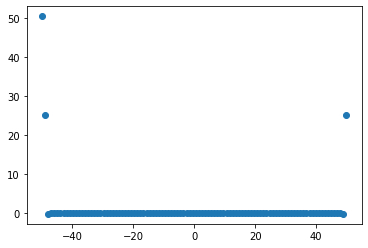

In [46]:
plt.plot(x_sin,np.real(window_fft),'o')
print('it seems like the Im getting the right answer just with the wrong sign...')
print('beyond this, I dont understand what the question is asking us for...')

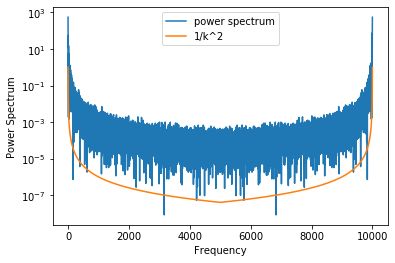

In [57]:
# Question 6 b 
# Generating a random walk 

n = 10000
walk = np.cumsum(np.random.randn(n))
freq = np.abs(np.fft.fftfreq(n,1/n))

walk_corr = correlation(walk,walk)

walk_pow = np.abs(np.fft.fft(walk_corr))

plt.plot(walk_pow[1:]/freq[1:].sum(),label='power spectrum') 
plt.plot(1/(freq[1:]**2),label='1/k^2')
plt.yscale('log')
plt.xlabel('Frequency')
plt.ylabel('Power Spectrum')
plt.legend()

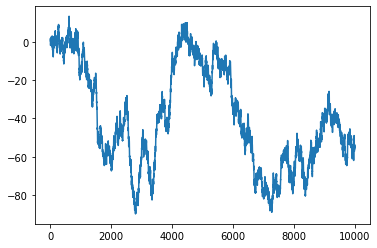

In [48]:
#plotting the walk to get a good look! 
plt.plot(walk)